# Test Lackey et al 2013 LAL implementation

MP 01/2016

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import lal
import lalsimulation as LS

In [3]:
q = 3 # eta > 6/49.
mNS = 1.35
M = (1. + q) * mNS
mBH = M - mNS
chi_BH = 0.5
Lambda = 2000

phiRef = 0
deltaF = 0.5
fLow = 10
fHigh = 4096
fRef = 10
distance = 100e6*lal.PC_SI 
inclination = pi/4
#inclination = pi/2
mBH_SI = mBH * lal.MSUN_SI
mNS_SI = mNS * lal.MSUN_SI

In [4]:
#freqs.data = np.array([10, 50, 100, 350, 900, 2000, 3500])
#freqs.data = np.linspace(10, 3500, n)

In [5]:
Hp, Hc = LS.SimIMRLackeyTidal2013(phiRef, deltaF, fLow, fHigh, fRef, distance, inclination, mBH_SI, mNS_SI, chi_BH, Lambda)
HpP, HcP = LS.SimIMRLackeyTidal2013(phiRef, deltaF, fLow, fHigh, fRef, distance, inclination, mBH_SI, mNS_SI, chi_BH, 0)

HpR, HcR = LS.SimIMRSEOBNRv2ROMDoubleSpinHI(phiRef, deltaF, fLow, fHigh, fRef, distance, inclination, mBH_SI, mNS_SI, chi_BH, 0, -1)

f = np.arange(Hp.data.length)*deltaF


# Create frequency sequence
f_in = f[20::4]
n = len(f_in)
freqs = lal.CreateREAL8Sequence(n)
freqs.data = f_in

HpS, HcS = LS.SimIMRLackeyTidal2013FrequencySequence(freqs, phiRef, fRef, distance, inclination, mBH_SI, mNS_SI, chi_BH, Lambda)
HpRS, HcRS = LS.SimIMRSEOBNRv2ROMDoubleSpinHIFrequencySequence(freqs, phiRef, fRef, distance, inclination, mBH_SI, mNS_SI, chi_BH, 0, -1)

h = Hp.data.data + 1j*Hc.data.data
hP = HpP.data.data + 1j*HcP.data.data
hS = HpS.data.data + 1j*HcS.data.data
hR = HpR.data.data + 1j*HcR.data.data

In [6]:
# sanity check: setting Lambda = 0 produces the unmodified ROM:
print np.allclose(hP, hR)

True


If the inclination is not 0 or pi/2, the amplitude between the FS and standard LAL version disagrees. This seems to be coming from the ROM. Need to understand why this happens.

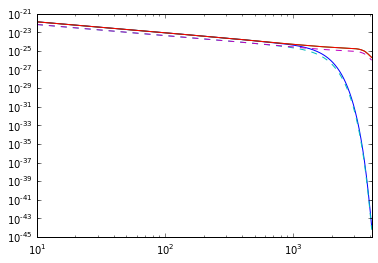

In [7]:
f = np.arange(Hp.data.length)*deltaF
loglog(f, abs(h))
loglog(f, abs(hP))
loglog(f, abs(hR))
loglog(freqs.data, abs(HpS.data.data), '--')
loglog(freqs.data, abs(HpRS.data.data), '--')
xlim([fLow,fHigh]);

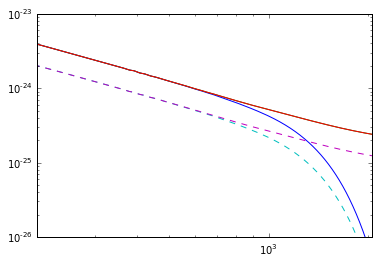

In [8]:
loglog(f, abs(h))
loglog(f, abs(hP))
loglog(f, abs(hR))
loglog(freqs.data, abs(HpS.data.data), '--')
loglog(freqs.data, abs(HpRS.data.data), '--')
xlim([200,2048]);
ylim([1e-26, 1e-23]);

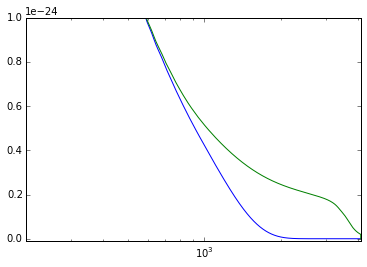

In [9]:
semilogx(f, abs(h))
semilogx(f, abs(hP))
xlim([200,fHigh]);
ylim([-0.1e-25,0.1e-23]);

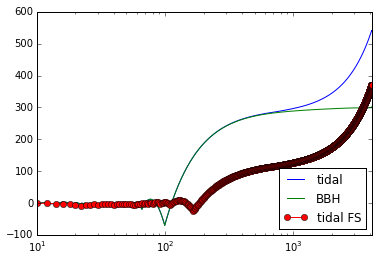

In [10]:
phi = unwrap(angle(h))
phiP = unwrap(angle(hP))
phiS = unwrap(angle(hS)) # phasing is different if the frequences are not the same

semilogx(f, phi, label='tidal')
semilogx(f, phiP, label='BBH')
semilogx(freqs.data, phiS, 'o-', label='tidal FS')
legend(loc='lower right')
xlim([fLow,fHigh]);

The tidal phasing should behave as in Fig. 8 of Lackey et al and fall off near merger:

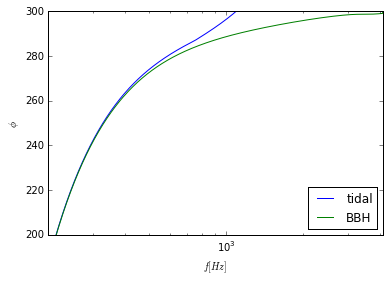

In [11]:
phi = unwrap(angle(h))
phiP = unwrap(angle(hP))
semilogx(f, phi, label='tidal')
semilogx(f, phiP, label='BBH')
legend(loc='lower right')
xlabel(r'$f [Hz]$')
ylabel(r'$\phi$')
xlim([200,fHigh]);
ylim([200,300]);

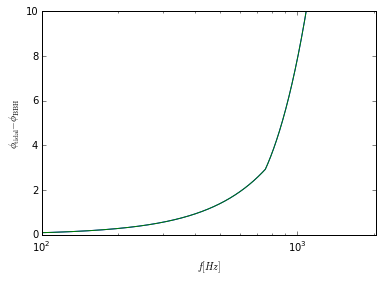

In [12]:
semilogx(f, phi - phiP)
semilogx(f, unwrap(angle(Hp.data.data) - angle(HpP.data.data)))
xlabel(r'$f [Hz]$')
ylabel(r'$\phi_\mathrm{tidal} - \phi_\mathrm{BBH}$')
xlim([100,2048]);
ylim([0,10]);

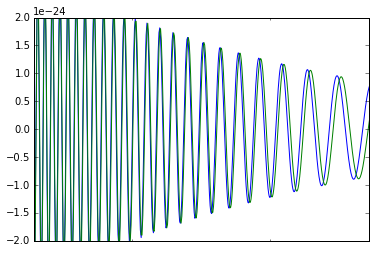

In [13]:
semilogx(f, real(Hp.data.data))
semilogx(f, real(HpP.data.data))
xlim([150,400]);
ylim([-0.2e-23,0.2e-23]);

## Read in Prayush's test data

In [14]:
sample_rate = 4096
time_length = 256 * 8
delta_f = 1./time_length
N = sample_rate * time_length
f_lower = 15.

Mmin, Mmax = [1.35, 5*1.35]
etamin, etamax = 5./36., 2./9.
smin, smax = -0.5, 0.75
tLambda = 600.

In [15]:
# 1 Frequency [Hz]
# 2 Real[h22]
# 3 Imag[h22]
data = loadtxt('testLackey/Lackey_M4.00_Et0.20_S0.50_L600.0_f15.0.dat.gz')
fPy = data.T[0]
hPy = data.T[1]+1j*data.T[2]

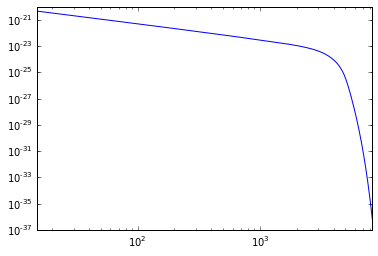

In [16]:
loglog(fPy, abs(hPy))
xlim([15,8192]);
ylim([1e-37, 1e-20]);

In [17]:
def etafun(q):
    return q/(1.0 + q)**2

def qfun(eta):
    return (1.0 + np.sqrt(1.0 - 4.0*eta) - 2.0*eta) / (2.0*eta)

In [18]:
q = qfun(0.2)
M = 4.0
chi_BH = 0.5
Lambda = 600
mBH = M*q/(1. + q)
mNS = M*1.0/(1. + q)

phiRef = 0
deltaF = 0.05
fLow = 15
fHigh = 16384
fRef = 15
distance = 10e6*lal.PC_SI 
inclination = pi/4

mBH_SI = mBH * lal.MSUN_SI
mNS_SI = mNS * lal.MSUN_SI

Hp, Hc = LS.SimIMRLackeyTidal2013(phiRef, deltaF, fLow, fHigh, fRef, distance, inclination, mBH_SI, mNS_SI, chi_BH, Lambda)
h = Hp.data.data + 1j*Hc.data.data
f = np.arange(Hp.data.length)*deltaF

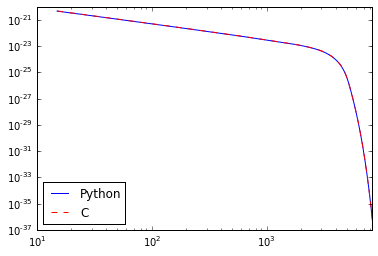

In [19]:
loglog(fPy, abs(hPy), label='Python')
loglog(f, 7*abs(h), 'r--', label='C')
legend(loc=3)
xlim([10, 8192]);
ylim([1e-37, 1e-20]);

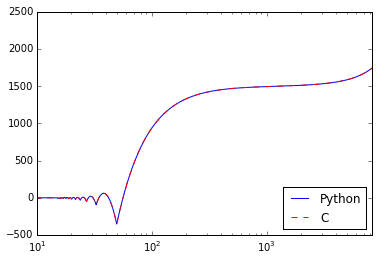

In [20]:
phiPy = unwrap(angle(hPy))
phi = unwrap(angle(h))
semilogx(fPy, phiPy, label='Python')
semilogx(f, phi, 'r--', label='C')
legend(loc=4)
xlim([10, 8192]);

In [21]:
np.allclose(fPy, f)

True

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


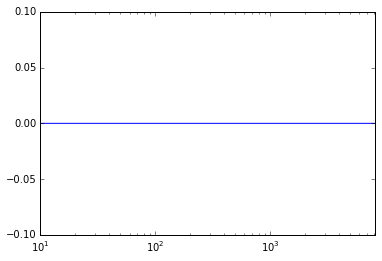

In [22]:
semilogx(f, phi-phiPy)
legend(loc=4)
xlim([10, 8192]);
ylim([-0.1,0.1]);

In [23]:
print fPy[50000], f[50000]
print hPy[50000], h[50000]

2500.0 2500.0
(6.988209721e-24-1.10276980928e-24j) (1.01825677728e-24-1.60685336737e-25j)


### Read in amplitude - phase test data

In [10]:
# 1 Frequency [Hz]
# 2 Real[h22]
# 3 Imag[h22]
data = loadtxt('testLackey/Lackey_amp_phi_M4.00_Et0.20_S0.50_L600.0_f15.0.dat.gz')
fPy = data.T[0]
APy = data.T[1]
PhiPy = data.T[2]
shape(data)

(524289, 3)

Use hacked C code that returns amp, phi corrections in hp, hc

In [11]:
def etafun(q):
    return q/(1.0 + q)**2

def qfun(eta):
    return (1.0 + np.sqrt(1.0 - 4.0*eta) - 2.0*eta) / (2.0*eta)

In [16]:
q = qfun(0.2)
M = 4.0
chi_BH = 0.5
Lambda = 600
mBH = M*q/(1. + q)
mNS = M*1.0/(1. + q)

phiRef = 0
deltaF = 0.05
fLow = 15
fHigh = 16384
fRef = 15
distance = 10e6*lal.PC_SI 
inclination = pi/4

mBH_SI = mBH * lal.MSUN_SI
mNS_SI = mNS * lal.MSUN_SI

Hp, Hc = LS.SimIMRLackeyTidal2013(phiRef, deltaF, fLow, fHigh, fRef, distance, inclination, mBH_SI, mNS_SI, chi_BH, Lambda)
amp = Hp.data.data
phi = Hc.data.data
f = np.arange(Hp.data.length)*deltaF

In [17]:
np.allclose(f,fPy)

True

In [18]:
np.allclose(APy,amp)

False

/usr/local/lib/python2.7/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


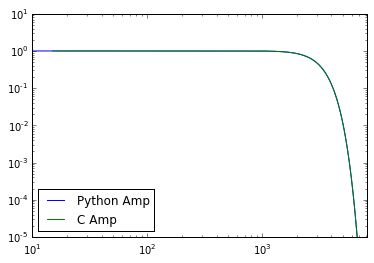

In [19]:
loglog(fPy, APy, label='Python Amp')
loglog(f, amp, label='C Amp')
legend(loc=3)
xlim([10, 8192]);
ylim([1e-5,10]);

In [20]:
amp[0:4]

array([ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j])

In [21]:
APy[0:4]

array([ 1.,  1.,  1.,  1.])

In [22]:
amp[0] = 1
np.allclose(APy,amp)

False

In [28]:
f[-1]

26214.400000000001

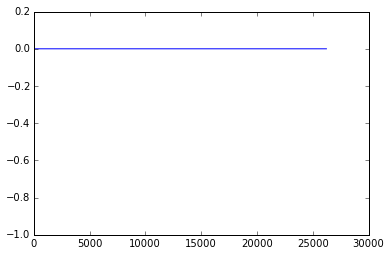

In [27]:
plot(f, amp - APy)

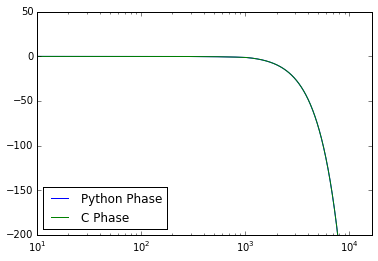

In [24]:
semilogx(fPy, PhiPy, label='Python Phase')
semilogx(f, phi, label='C Phase')
legend(loc=3)
xlim([10, 16384]);
ylim([-200,50]);

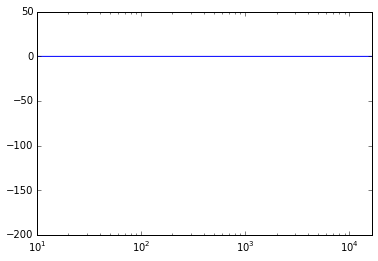

In [25]:
semilogx(f, PhiPy-phi)
xlim([10, 16384]);
ylim([-200,50]);

In [ ]:
C:
tidalCorrectionAmplitude: dmf, B, C, Lambda: 0.00083608 3.09814e-08 53.01 600
tidalCorrectionAmplitude: dmf, B, C, Lambda: 0.00182118 3.20195e-07 53.01 600
        
Py:
tidalCorrectionAmplitude: mf-mfA, B, C, D, Lambda: 0.000836080256196 3.09814192082e-08 53.0099512423 3.0 600.0
tidalCorrectionAmplitude: mf-mfA, B, C, D, Lambda: 0.0018211784613 3.20195276422e-07 53.0099512423 3.0 600.0

In [ ]:
C:
tidalPNPhaseCoefficients: a0, a1, G: -752.947 -1723.17 6.487
tidalPNPhaseCoefficients: g0, g1, g2, g3, eta, chiBH: -4.6339 27.719 10.268 -41.741 0.2 0.5
        
Py:
tidalCorrectionPhase: a0, a1, G: -752.946585265 -1723.17014568 6.48699886976
tidalCorrectionPhase: g0, g1, g2, g3, eta, sBH -4.6339 27.719 10.268 -41.741 0.2 0.5

In [ ]:
C:
mfP, E: 0.02 3.47033e-05
psiT, DpsiT: -1.19315 -0.0755722
mfP, E: 0.02 0.000152818
psiT, DpsiT: -1.19315 -0.183926
    
Py:
mfP, E 0.02 3.47032936193e-05
psiT, DpsiT -1.26987534248 -113.359286298
mfP, E 0.02 0.000152817736028
psiT, DpsiT -1.38392297231 -118.186736655

    psiT, DpsiT disagree


In [ ]:
C:
mf, v: 0.000985098 0.145728
mf, v: 0.0019702 0.183606
    
mf, v: 0.0206871 0.402053
mfP, E: 0.02 3.47033e-05
psiT, DpsiT: -1.26988 -0.0778849
    
Py:
v 0.402052621695
mfP, E 0.02 3.47032936193e-05
psiT, DpsiT -1.26987534248 -113.359286298